# Chapter 3 Classification

## MNIST

In [8]:
# fetch MNIST dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,as_frame=False) # we set as_frame = False so that it won't return a Pandas DataFrame
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
type(mnist["data"]) # Check the data is in np array not data frame to be consistent with the book

numpy.ndarray

In [10]:
# feature names
features = mnist["feature_names"]
print(features[:10],features[-10:])

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10'] ['pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel784']


In [11]:
# data and label
X,y = mnist["data"],mnist["target"]
print(X.shape,y.shape)
print(X[:10])

(70000, 784) (70000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


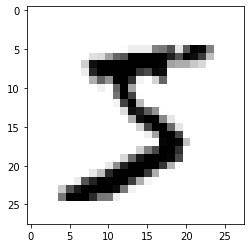

In [15]:
# image example
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) # pixel data was stored in one array

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("on")
plt.show()

In [16]:
# verify the label
y[0]

'5'

In [17]:
# convert string to int
import numpy as np

y = y.astype(np.uint8)

In [18]:
# split test/train set
 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 
# note that the data is already shuffled, otherwise we will need to shuffle the data first to avoid each 
# cross-validation fold not having the similar ratio of each class

### Training a Binary Classifier 

In [19]:
# convert multiclass label into binary('5' and 'not 5')
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
# Stochastic Gradient Descent classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [25]:
# test the model by trying our sample image
sgd_clf.predict([some_digit])

array([ True])

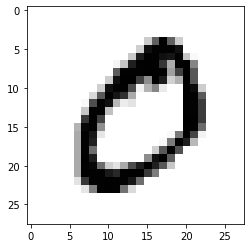

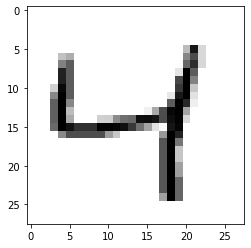

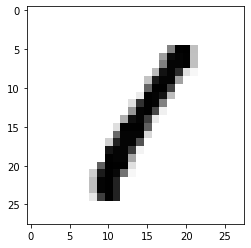

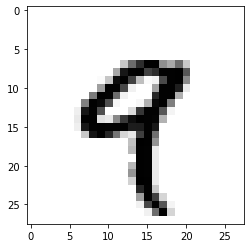

In [27]:
# try some more images
more_img = X[1:5]
for i in range(len(more_img)):
    image = more_img[i].reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.show()

In [28]:
# check the label
print(y[1:5])

[0 4 1 9]


In [29]:
# predict the model
sgd_clf.predict(more_img)

array([False, False, False, False])

## Performance Measure

### Measuring Accuracy Using Cross-Validation

In [30]:
# compute cross-validation score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [31]:
# make a dummy model(always reject)
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [39]:
# try the dummy predictor
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [38]:
# ratio of 'True' in the entire target set
print(sum(y_train_5)/len(y_train_5))

0.09035


### Confusion Matrix

In [40]:
# cross-validation prediction(predictions made by a model that never saw the predicted data during training)
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [51]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [53]:
# what confusion matrix for 'perfect model' should look like
y_perf_pred = y_train_5
confusion_matrix(y_train_5,y_perf_pred)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall 

In [54]:
# compute precision and recall
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [46]:
# f1 score: harmonic mean of precision and recall
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

### Precision/Recall Trade-off

In [56]:
# decision function(activation function) output
y_score = sgd_clf.decision_function([some_digit])
print(y_score)

[2164.22030239]


In [122]:
# use threshold 
y_score = sgd_clf.decision_function(X_train)
for i in range(10):
    threshold = 1000*i-5000
    y_score_pred = (y_score>threshold)
    print('threshold: ', threshold)
    print('confusion matrix: \n', confusion_matrix(y_train_5,y_score_pred))
    print('precision: ', precision_score(y_train_5,y_score_pred))
    print('recall: ', recall_score(y_train_5,y_score_pred))
    print('f1_score: ', f1_score(y_train_5,y_score_pred),'\n-------------------------------')

threshold:  -5000
confusion matrix: 
 [[28496 26083]
 [   84  5337]]
precision:  0.16985996180776575
recall:  0.9845047039291643
f1_score:  0.2897315490893298 
-------------------------------
threshold:  -4000
confusion matrix: 
 [[34841 19738]
 [  113  5308]]
precision:  0.2119300487103729
recall:  0.9791551374285187
f1_score:  0.3484425772146913 
-------------------------------
threshold:  -3000
confusion matrix: 
 [[41019 13560]
 [  171  5250]]
precision:  0.27910685805422647
recall:  0.9684560044272275
f1_score:  0.4333292063885106 
-------------------------------
threshold:  -2000
confusion matrix: 
 [[46285  8294]
 [  232  5189]]
precision:  0.3848550025958615
recall:  0.9572034679948349
f1_score:  0.5489843419382142 
-------------------------------
threshold:  -1000
confusion matrix: 
 [[49998  4581]
 [  373  5048]]
precision:  0.5242496624779313
recall:  0.9311935067330751
f1_score:  0.6708305647840531 
-------------------------------
threshold:  0
confusion matrix: 
 [[52316  

In [121]:
# compute decision function score using cross-validation prediction (better than the previous one)

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [123]:
for i in range(10):
    threshold = 1000*i-5000
    y_score_pred = (y_scores>threshold)
    print('threshold: ', threshold)
    print('confusion matrix: \n', confusion_matrix(y_train_5,y_score_pred))
    print('precision: ', precision_score(y_train_5,y_score_pred))
    print('recall: ', recall_score(y_train_5,y_score_pred))
    print('f1_score: ', f1_score(y_train_5,y_score_pred),'\n-------------------------------')

threshold:  -5000
confusion matrix: 
 [[51793  2786]
 [  788  4633]]
precision:  0.6244776924113762
recall:  0.8546393654307324
f1_score:  0.7216510903426793 
-------------------------------
threshold:  -4000
confusion matrix: 
 [[52457  2122]
 [  956  4465]]
precision:  0.6778503112190679
recall:  0.823648773289061
f1_score:  0.7436708860759494 
-------------------------------
threshold:  -3000
confusion matrix: 
 [[53011  1568]
 [ 1166  4255]]
precision:  0.7307229950197492
recall:  0.784910533111972
f1_score:  0.7568480967627178 
-------------------------------
threshold:  -2000
confusion matrix: 
 [[53428  1151]
 [ 1403  4018]]
precision:  0.7773263687366996
recall:  0.7411916620549714
f1_score:  0.7588290840415487 
-------------------------------
threshold:  -1000
confusion matrix: 
 [[53685   894]
 [ 1625  3796]]
precision:  0.8093816631130064
recall:  0.7002398081534772
f1_score:  0.7508653941252101 
-------------------------------
threshold:  0
confusion matrix: 
 [[53892   687

In [124]:
# plot the precision-recall curve
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

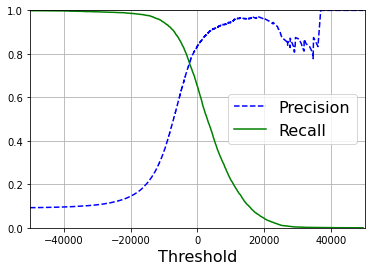

In [126]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()    

In [129]:
# get the first threshold that precision > 0.9
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
# use this threshold as the classifier
y_train_pred_90 = (y_scores >= threshold_90_precision)
# Check precision score and recall score
print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5,y_train_pred_90))

0.9000345901072293
0.4799852425751706


### The ROC Curve 

In [130]:
# plot the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

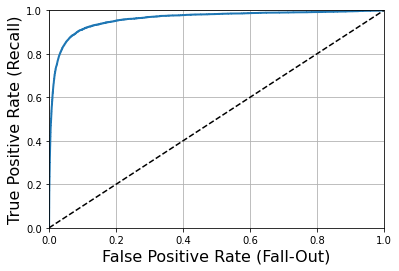

In [132]:
# plot the roc curve
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown
    
plot_roc_curve(fpr,tpr)
plt.show()

In [133]:
# AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [135]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

In [136]:
y_probas_forest # first column = probability of not 5; second column = probability of 5

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [137]:
# get the probability of being 5
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

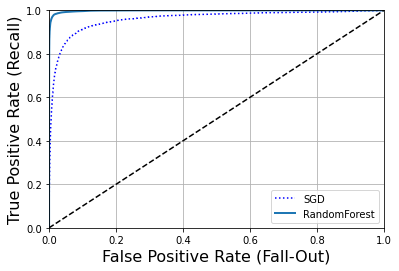

In [139]:
# compare 2 curves
plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'RandomForest')
plt.legend(loc='lower right')
plt.show()

In [140]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

## Multiclass Classification 

In [141]:
# support vector machine classifier(OvO strategy by default)
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [142]:
# decision function of multiclass classifier
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


In [143]:
# find the largest score
np.argmax(some_digit_scores) # return the index of the maximum

5

In [144]:
# use classifier to find the prediction
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [145]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [147]:
# OvR strategy
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [148]:
# number of estimators
len(ovr_clf.estimators_)

10

In [151]:
# Stochastic gradient descent(OvR by default)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [152]:
# prediction sample
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [153]:
# sgd decision function
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [154]:
# cross-validation score for sgd classifier
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [155]:
# improve the performance by scaling the inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis 

In [156]:
# cross-validation predictions of sgd classifier 
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)

In [157]:
# confusion matrix of sgd prediction results
conf_mx = confusion_matrix(y_train,y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


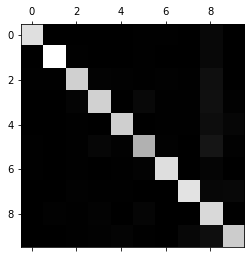

In [158]:
# plot the confusion matrix
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [160]:
# scale the confution matrix by dividing the row sum: ratio of preditions for certain label
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

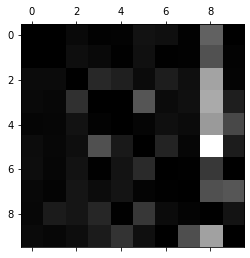

In [161]:
# fill the diagonal with 0 to keep only the errors
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

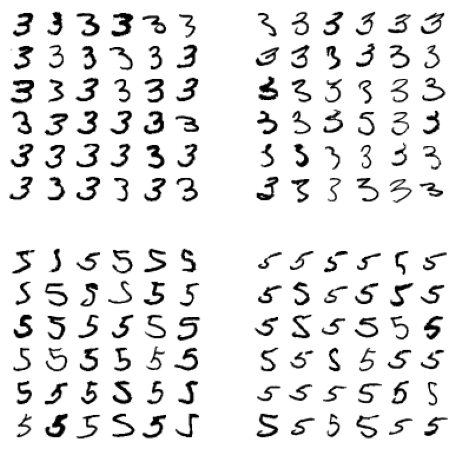

In [163]:
# Show right and wrong predictions for class 3 and 5
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


cl_a,cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:36],images_per_row=6)
plt.subplot(222); plot_digits(X_ab[:36],images_per_row=6)
plt.subplot(223); plot_digits(X_ba[:36],images_per_row=6)
plt.subplot(224); plot_digits(X_bb[:36],images_per_row=6)
plt.show()

## Multilabel Classification 

In [164]:
# multilabel classification problem: 1. is it large(>=7)? 2. is it odd?
# use knn model
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [165]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [166]:
# cross-validation prediction
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [167]:
# f1 score
f1_score(y_multilabel,y_train_knn_pred,average='macro')

0.976410265560605

## Multioutput Classification

In [170]:
# multioutput classification problem: add noise to image and predict the original image(like regression very much)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

In [171]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier()

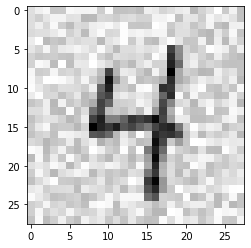

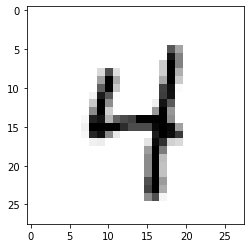

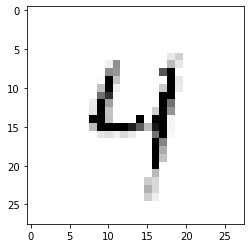

In [176]:
some_noise_digit = X_test_mod[19].reshape(28,28)
some_original_digit = y_test_mod[19].reshape(28,28)
clean_digit = knn_clf.predict([X_test_mod[19]]).reshape(28,28)

plt.imshow(some_noise_digit,cmap='binary')
plt.show()
plt.imshow(some_original_digit,cmap='binary')
plt.show()
plt.imshow(clean_digit,cmap='binary')
plt.show()